In [1]:
#Pandas is most commonly used for data wrangling and data manipulation purposes 
#Numpy is a fundmental library for numerical computing in python.Mathematical Operation, Arrays, linear algebra etc
#Removing Duplicates 
#Fixing Null Values(Region, NA_Sales)
#Standardizing categorial values(country)
#Renaming Columns
#Handling Outliers(Global Sales)

In [72]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('D:/Course/Python/Python Mar 2025/pandas/VideoGamesSales.csv')
#df=df[df.duplicated()]
df = df.drop_duplicates()
df['Region'] = df['Region'].fillna('North')
df['NA_Sales'] = df['NA_Sales'].replace('[$]','',regex=True)
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'], errors='coerce')
Average_Sales = df['NA_Sales'].mean()
Average_Sales=int(Average_Sales)
df['NA_Sales']=df['NA_Sales'].fillna(Average_Sales)


df['Country']=df['Country'].replace({'United States':'USA'})
df['Country']=df['Country'].replace({'USA':'United States'})
df['Country']=df['Country'].str.title()
df=df.rename(columns={'NA_Sales':'National Sales','Global_Sales':'Global Sales','NA_Profit':'National Profit','Global_Profit':'Global Profit'})

sales_cap = df['National Sales'].quantile(0.95)
df['National Sales'] = np.where(df['National Sales'] > sales_cap, sales_cap, df['National Sales'])
df.head(5)



Matplotlib is building the font cache; this may take a moment.


,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,2.07,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,2.07,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,2.07,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,2.07,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,2.07,31.37,3.381,9.411


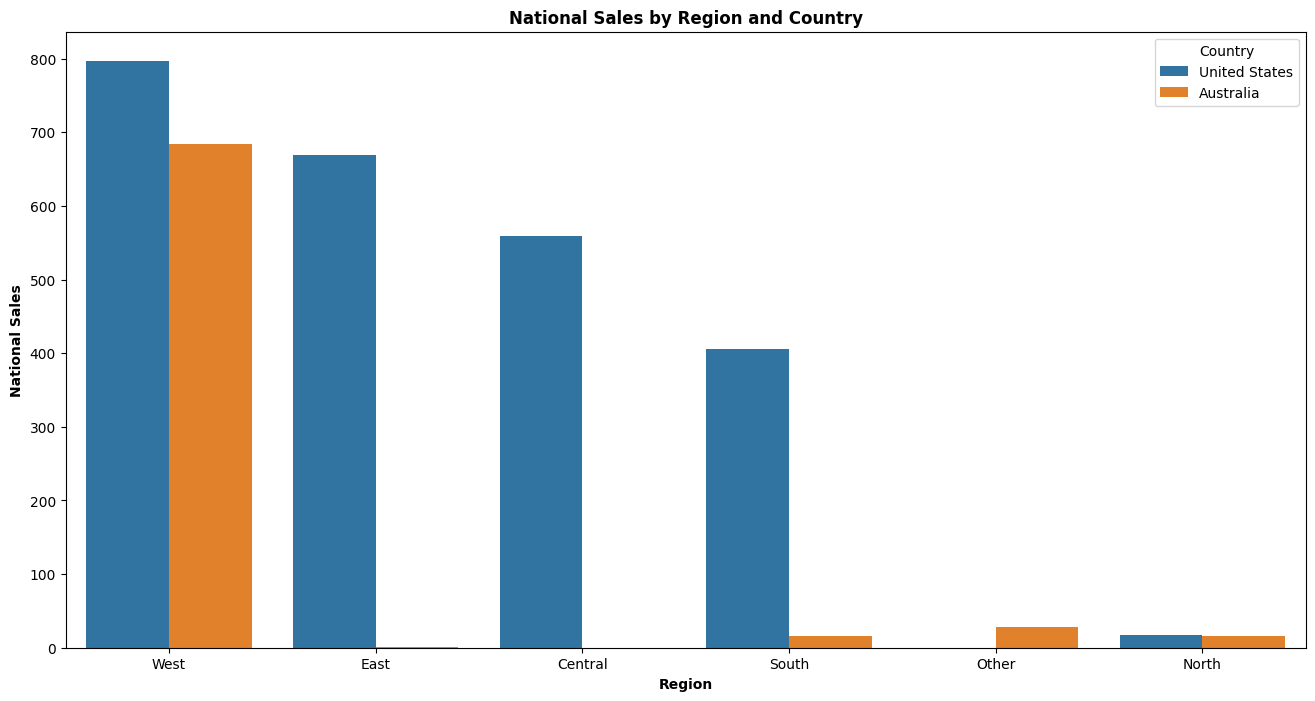

In [88]:
#create a bar chart 

National_Sales=df.groupby(['Region','Country'])['National Sales'].sum().reset_index().sort_values(by='National Sales', ascending=False)
National_Sales
plt.figure(figsize=(16, 8))
sns.barplot(data=National_Sales, x='Region', y='National Sales', hue='Country')
plt.title('National Sales by Region and Country',fontweight='bold')
plt.xlabel('Region',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()

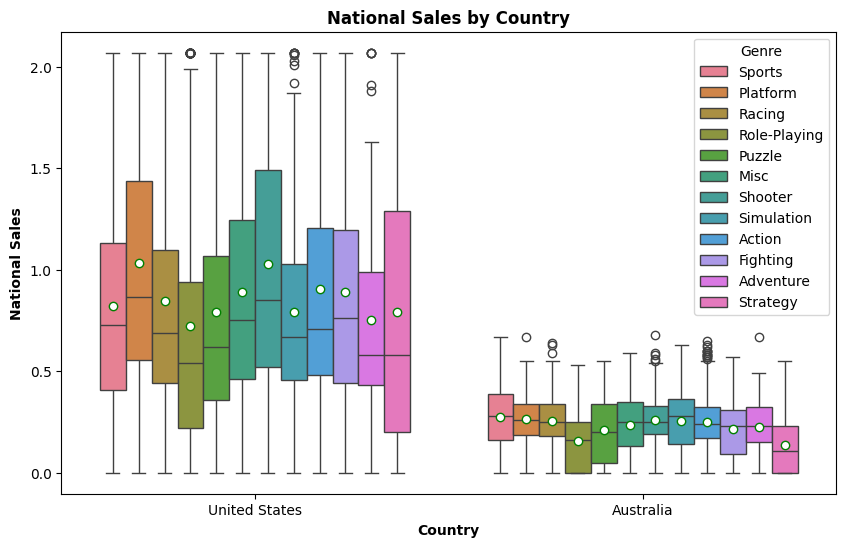

In [94]:
#Create Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='National Sales', data=df, showmeans=True, hue='Genre', meanprops={"marker":"o",
                                                                                              "markerfacecolor":"white",
                                                                                              "markersize":"6",
                                                                                              "markeredgecolor":"green"})

plt.title('National Sales by Country',fontweight='bold')
plt.xlabel('Country',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()

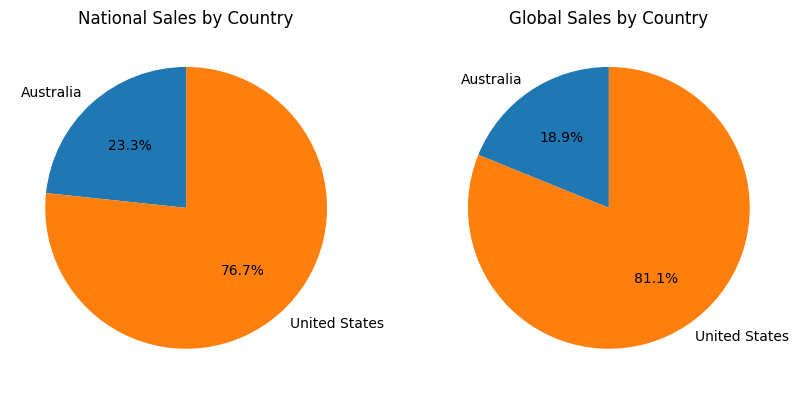

In [110]:
#Create a pie Chart 
Sales=df.groupby(['Country'])[['National Sales','Global Sales']].sum().reset_index()
Country=Sales['Country']
National_Sales=Sales['National Sales']
Global_Sales=Sales['Global Sales']


fig, axs = plt.subplots(1, 2, figsize=(10, 7))

axs[0].pie(National_Sales, labels=Country, autopct='%1.1f%%', startangle=90)
axs[0].set_title('National Sales by Country')

axs[1].pie(Global_Sales, labels=Country, autopct='%1.1F%%', startangle=90)
axs[1].set_title('Global Sales by Country')
plt.show()





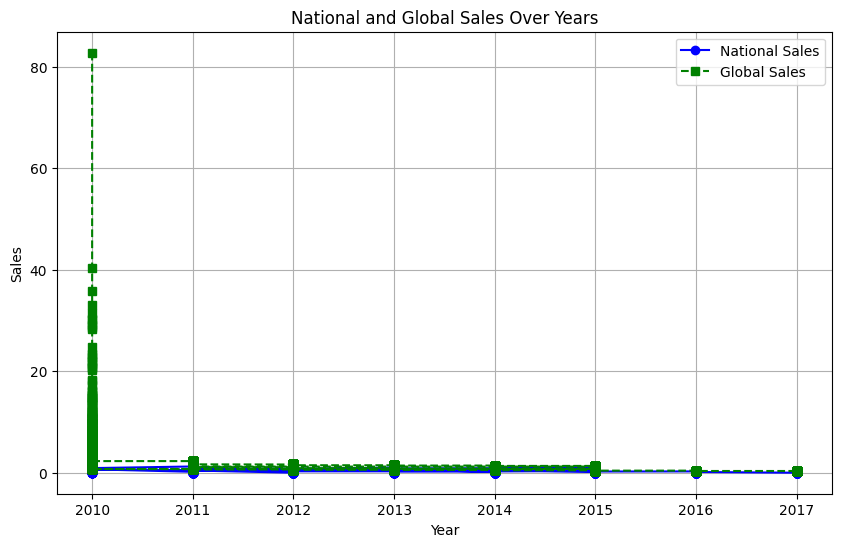

In [116]:
#Create Line Chart
plt.figure(figsize=(10, 6))

#Line for National Sales
plt.plot(df['Year'], df['National Sales'],marker='o', linestyle='-', color='b', label='National Sales')

#Line for Global Sales
plt.plot(df['Year'], df['Global Sales'], marker='s', linestyle='--', color='g',label='Global Sales')

# Adding title and labels 
plt.title('National and Global Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()

#Display the line chart
plt.grid(True)
plt.show()
           